In [79]:
%run ./ml_model_init.ipynb

## Baseline Model


In [80]:
# Split the gk data into train and test sets
for_splits = split_data(fwd_player_data)

#### Linear Model


In [81]:

base_for_lin_reg = Linear_regression(for_splits['feature_train'], for_splits['features_test'],
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = pd.DataFrame({"base_for_lin_reg": [base_for_lin_reg['train_MAE'], base_for_lin_reg['test_MAE'], base_for_lin_reg['train_RMSE'], base_for_lin_reg['test_RMSE'], base_for_lin_reg['cv_rmse'], base_for_lin_reg['R2_train'], base_for_lin_reg['R2_test']]},
                                                        index=(['train_MAE','test_MAE', 'train_RMSE', 'test_RMSE', 'cv_rmse', 'R2_train', 'R2_test']))

for_evaluation_stats

Training set RMSE: 0.889666407399506
Test set RMSE: 0.9561964752077706
Training set R2: 0.8858177465391547
Test set R2: 0.8835982131667244


,base_for_lin_reg
train_MAE,0.586443
test_MAE,0.612897
train_RMSE,0.889666
test_RMSE,0.956196
cv_rmse,0.898049
R2_train,0.885818
R2_test,0.883598


#### DecisionTree Model


In [82]:
base_for_dt_reg = DecisionTreeRegression(for_splits['feature_train'], for_splits['features_test'],
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(base_for_dt_reg = [base_for_dt_reg['train_MAE'], base_for_dt_reg['test_MAE'], base_for_dt_reg['train_RMSE'], base_for_dt_reg['test_RMSE'], base_for_dt_reg['cv_rmse'], base_for_dt_reg['R2_train'], base_for_dt_reg['R2_test']])

for_evaluation_stats



,base_for_lin_reg,base_for_dt_reg
train_MAE,0.586443,4.291242e-16
test_MAE,0.612897,7.119816e-01
train_RMSE,0.889666,6.734482e-16
test_RMSE,0.956196,1.641203e+00
cv_rmse,0.898049,1.549568e+00
R2_train,0.885818,1.000000e+00
R2_test,0.883598,6.570821e-01


#### RandomForest Model


In [83]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
base_for_rf_reg = RandomForestRegression(for_splits['feature_train'], for_splits['features_test'],
                               for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(base_for_rf_reg = [base_for_rf_reg['train_MAE'], base_for_rf_reg['test_MAE'], base_for_rf_reg['train_RMSE'], base_for_rf_reg['test_RMSE'], base_for_rf_reg['cv_rmse'], base_for_rf_reg['R2_train'], base_for_rf_reg['R2_test']])

for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg
train_MAE,0.586443,4.291242e-16,0.353227
test_MAE,0.612897,7.119816e-01,0.705478
train_RMSE,0.889666,6.734482e-16,0.656106
test_RMSE,0.956196,1.641203e+00,1.284877
cv_rmse,0.898049,1.549568e+00,1.159589
R2_train,0.885818,1.000000e+00,0.937900
R2_test,0.883598,6.570821e-01,0.789821


#### XgBoost Model


In [84]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
base_for_xgb_reg = XGBoostRegression(for_splits['feature_train'], for_splits['features_test'], for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(base_for_xgb_reg = [base_for_xgb_reg['train_MAE'], base_for_xgb_reg['test_MAE'], base_for_xgb_reg['train_RMSE'], base_for_xgb_reg['test_RMSE'], base_for_xgb_reg['cv_rmse'], base_for_xgb_reg['R2_train'], base_for_xgb_reg['R2_test']])
for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877
test_MAE,0.612897,7.119816e-01,0.705478,0.737142
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588
R2_train,0.885818,1.000000e+00,0.937900,0.884138
R2_test,0.883598,6.570821e-01,0.789821,0.809382


# Feature engineering


### VarianceThreshold


In [85]:
VT_scaler = StandardScaler()
df_for_train_scaled = pd.DataFrame(VT_scaler.fit_transform(for_splits['feature_train']), columns=for_splits['feature_train'].columns)
df_for_test_scaled = pd.DataFrame(VT_scaler.transform(for_splits['features_test']), columns=for_splits['features_test'].columns)

selector = VarianceThreshold(threshold = 0.1)
selector.fit_transform(df_for_train_scaled)

for_threshold_columns = df_for_train_scaled.columns[selector.get_support()]

for_threshold_train = df_for_train_scaled[for_threshold_columns]
for_threshold_test = df_for_test_scaled[for_threshold_columns]

for_threshold_train.shape, for_threshold_test.shape

((1736, 18), (434, 18))

#### Model(VT)


##### Linear Model


In [86]:

VarT_for_lin_reg = Linear_regression(for_threshold_train, for_threshold_test,
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(VarT_for_lin_reg =  [VarT_for_lin_reg['train_MAE'], VarT_for_lin_reg['test_MAE'],  VarT_for_lin_reg['train_RMSE'], VarT_for_lin_reg['test_RMSE'], VarT_for_lin_reg['cv_rmse'], VarT_for_lin_reg['R2_train'], VarT_for_lin_reg['R2_test']])

for_evaluation_stats

Training set RMSE: 0.889666407399506
Test set RMSE: 0.9561964752077731
Training set R2: 0.8858177465391547
Test set R2: 0.8835982131667237


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877,0.586443
test_MAE,0.612897,7.119816e-01,0.705478,0.737142,0.612897
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187,0.889666
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626,0.956196
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588,0.898049
R2_train,0.885818,1.000000e+00,0.937900,0.884138,0.885818
R2_test,0.883598,6.570821e-01,0.789821,0.809382,0.883598


##### DecisionTree Model


In [87]:
VarT_for_dt_reg = DecisionTreeRegression(for_threshold_train, for_threshold_test,
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(VarT_for_dt_reg = [VarT_for_dt_reg['train_MAE'], VarT_for_dt_reg['test_MAE'], VarT_for_dt_reg['train_RMSE'], VarT_for_dt_reg['test_RMSE'], VarT_for_dt_reg['cv_rmse'], VarT_for_dt_reg['R2_train'], VarT_for_dt_reg['R2_test']])

for_evaluation_stats



,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877,0.586443,3.913920e-16
test_MAE,0.612897,7.119816e-01,0.705478,0.737142,0.612897,7.119816e-01
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187,0.889666,6.302489e-16
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626,0.956196,1.625687e+00
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588,0.898049,1.561820e+00
R2_train,0.885818,1.000000e+00,0.937900,0.884138,0.885818,1.000000e+00
R2_test,0.883598,6.570821e-01,0.789821,0.809382,0.883598,6.635356e-01


##### RandomForest Model


In [88]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
VarT_for_rf_reg = RandomForestRegression(for_threshold_train, for_threshold_test,
                               for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(VarT_for_rf_reg = [VarT_for_rf_reg['train_MAE'], VarT_for_rf_reg['test_MAE'], VarT_for_rf_reg['train_RMSE'], VarT_for_rf_reg['test_RMSE'], VarT_for_rf_reg['cv_rmse'], VarT_for_rf_reg['R2_train'], VarT_for_rf_reg['R2_test']])

for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877,0.586443,3.913920e-16,0.353403
test_MAE,0.612897,7.119816e-01,0.705478,0.737142,0.612897,7.119816e-01,0.704279
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187,0.889666,6.302489e-16,0.656765
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626,0.956196,1.625687e+00,1.283493
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588,0.898049,1.561820e+00,1.163596
R2_train,0.885818,1.000000e+00,0.937900,0.884138,0.885818,1.000000e+00,0.937775
R2_test,0.883598,6.570821e-01,0.789821,0.809382,0.883598,6.635356e-01,0.790274


##### XgBoost Model


In [89]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
VarT_for_xgb_reg = XGBoostRegression(for_threshold_train, for_threshold_test, for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(VarT_for_xgb_reg = [VarT_for_xgb_reg['train_MAE'], VarT_for_xgb_reg['test_MAE'], VarT_for_xgb_reg['train_RMSE'], VarT_for_xgb_reg['test_RMSE'], VarT_for_xgb_reg['cv_rmse'], VarT_for_xgb_reg['R2_train'], VarT_for_xgb_reg['R2_test']])
for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877,0.586443,3.913920e-16,0.353403,0.558877
test_MAE,0.612897,7.119816e-01,0.705478,0.737142,0.612897,7.119816e-01,0.704279,0.737142
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187,0.889666,6.302489e-16,0.656765,0.896187
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626,0.956196,1.625687e+00,1.283493,1.223626
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588,0.898049,1.561820e+00,1.163596,1.150588
R2_train,0.885818,1.000000e+00,0.937900,0.884138,0.885818,1.000000e+00,0.937775,0.884138
R2_test,0.883598,6.570821e-01,0.789821,0.809382,0.883598,6.635356e-01,0.790274,0.809382


### Feature selection techniques


#### K-best features


In [90]:

from sklearn.feature_selection import SelectKBest, mutual_info_regression

k_rf_model = RandomForestRegressor(n_estimators=20,  max_depth=8, criterion='friedman_mse', max_features='sqrt', random_state=18)

score_list  = []

for k in range(1, for_splits['features_test'].shape[1]):
  selector = SelectKBest(mutual_info_regression, k=k)
  k_sel_X_train =  selector.fit_transform(for_threshold_train, for_splits['target_train'])

  k_rf_model.fit(k_sel_X_train, for_splits['target_train'])

  k_sel_cols = for_threshold_train.columns[selector.get_support()]
  k_sel_X_test = for_threshold_test[k_sel_cols]
  score = round(k_rf_model.score(k_sel_X_test.values, for_splits['target_test'] ), 3)

  score_list.append(score)
print(score_list, score_list.index(max(score_list)))
num_of_feat = score_list.index(max(score_list)) # find the highest score. We will use  that as the value of k

[0.628, 0.631, 0.668, 0.704, 0.707, 0.713, 0.704, 0.712, 0.757, 0.72, 0.73, 0.741, 0.715, 0.725, 0.747, 0.739, 0.739] 8


In [91]:
selector = SelectKBest(mutual_info_regression, k=num_of_feat+1)
selector.fit_transform(for_threshold_train, for_splits['target_train'])

sel_feats = selector.get_feature_names_out()
k_sel_X_train = for_threshold_train[sel_feats]
k_sel_X_test = for_threshold_test[sel_feats]

##### Model (KBest)


###### Linear Model


In [92]:

KBest_for_lin_reg = Linear_regression(k_sel_X_train, k_sel_X_test,
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(KBest_for_lin_reg =  [KBest_for_lin_reg['train_MAE'], KBest_for_lin_reg['test_MAE'], KBest_for_lin_reg['train_RMSE'], KBest_for_lin_reg['test_RMSE'], KBest_for_lin_reg['cv_rmse'], KBest_for_lin_reg['R2_train'], KBest_for_lin_reg['R2_test']])

for_evaluation_stats

Training set RMSE: 1.2269470656822044
Test set RMSE: 1.2419906085771353
Training set R2: 0.7828319771438548
Test set R2: 0.803617857436417


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877,0.586443,3.913920e-16,0.353403,0.558877,0.842456
test_MAE,0.612897,7.119816e-01,0.705478,0.737142,0.612897,7.119816e-01,0.704279,0.737142,0.864978
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187,0.889666,6.302489e-16,0.656765,0.896187,1.226947
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626,0.956196,1.625687e+00,1.283493,1.223626,1.241991
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588,0.898049,1.561820e+00,1.163596,1.150588,1.238834
R2_train,0.885818,1.000000e+00,0.937900,0.884138,0.885818,1.000000e+00,0.937775,0.884138,0.782832
R2_test,0.883598,6.570821e-01,0.789821,0.809382,0.883598,6.635356e-01,0.790274,0.809382,0.803618


###### DecisionTree Model


In [93]:
KBest_for_dt_reg = DecisionTreeRegression(k_sel_X_train, k_sel_X_test,
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(KBest_for_dt_reg = [KBest_for_dt_reg['train_MAE'], KBest_for_dt_reg['test_MAE'], KBest_for_dt_reg['train_RMSE'], KBest_for_dt_reg['test_RMSE'], KBest_for_dt_reg['cv_rmse'], KBest_for_dt_reg['R2_train'], KBest_for_dt_reg['R2_test']])

for_evaluation_stats



,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877,0.586443,3.913920e-16,0.353403,0.558877,0.842456,2.573594e-15
test_MAE,0.612897,7.119816e-01,0.705478,0.737142,0.612897,7.119816e-01,0.704279,0.737142,0.864978,9.792627e-01
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187,0.889666,6.302489e-16,0.656765,0.896187,1.226947,5.263334e-15
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626,0.956196,1.625687e+00,1.283493,1.223626,1.241991,1.930235e+00
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588,0.898049,1.561820e+00,1.163596,1.150588,1.238834,1.748948e+00
R2_train,0.885818,1.000000e+00,0.937900,0.884138,0.885818,1.000000e+00,0.937775,0.884138,0.782832,1.000000e+00
R2_test,0.883598,6.570821e-01,0.789821,0.809382,0.883598,6.635356e-01,0.790274,0.809382,0.803618,5.256645e-01


###### RandomForest Model


In [94]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
KBest_for_rf_reg = RandomForestRegression(k_sel_X_train, k_sel_X_test,
                               for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(KBest_for_rf_reg = [KBest_for_rf_reg['train_MAE'], KBest_for_rf_reg['test_MAE'], KBest_for_rf_reg['train_RMSE'], KBest_for_rf_reg['test_RMSE'], KBest_for_rf_reg['cv_rmse'], KBest_for_rf_reg['R2_train'], KBest_for_rf_reg['R2_test']])

for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877,0.586443,3.913920e-16,0.353403,0.558877,0.842456,2.573594e-15,0.416277
test_MAE,0.612897,7.119816e-01,0.705478,0.737142,0.612897,7.119816e-01,0.704279,0.737142,0.864978,9.792627e-01,0.736166
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187,0.889666,6.302489e-16,0.656765,0.896187,1.226947,5.263334e-15,0.761080
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626,0.956196,1.625687e+00,1.283493,1.223626,1.241991,1.930235e+00,1.345073
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588,0.898049,1.561820e+00,1.163596,1.150588,1.238834,1.748948e+00,1.294282
R2_train,0.885818,1.000000e+00,0.937900,0.884138,0.885818,1.000000e+00,0.937775,0.884138,0.782832,1.000000e+00,0.916439
R2_test,0.883598,6.570821e-01,0.789821,0.809382,0.883598,6.635356e-01,0.790274,0.809382,0.803618,5.256645e-01,0.769667


###### XgBoost Model


In [95]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
KBest_for_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(KBest_for_xgb_reg = [KBest_for_xgb_reg['train_MAE'], KBest_for_xgb_reg['test_MAE'], KBest_for_xgb_reg['train_RMSE'], KBest_for_xgb_reg['test_RMSE'], KBest_for_xgb_reg['cv_rmse'], KBest_for_xgb_reg['R2_train'], KBest_for_xgb_reg['R2_test']])
for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877,0.586443,3.913920e-16,0.353403,0.558877,0.842456,2.573594e-15,0.416277,0.632675
test_MAE,0.612897,7.119816e-01,0.705478,0.737142,0.612897,7.119816e-01,0.704279,0.737142,0.864978,9.792627e-01,0.736166,0.775704
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187,0.889666,6.302489e-16,0.656765,0.896187,1.226947,5.263334e-15,0.761080,1.031916
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626,0.956196,1.625687e+00,1.283493,1.223626,1.241991,1.930235e+00,1.345073,1.269387
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588,0.898049,1.561820e+00,1.163596,1.150588,1.238834,1.748948e+00,1.294282,1.282757
R2_train,0.885818,1.000000e+00,0.937900,0.884138,0.885818,1.000000e+00,0.937775,0.884138,0.782832,1.000000e+00,0.916439,0.846385
R2_test,0.883598,6.570821e-01,0.789821,0.809382,0.883598,6.635356e-01,0.790274,0.809382,0.803618,5.256645e-01,0.769667,0.794858


#### Mutual Information


In [96]:
from sklearn.feature_selection import mutual_info_regression
# def_sel_X_train
mutual_info = mutual_info_regression(k_sel_X_train, for_splits['target_train'])
mutual_info

array([0.48997019, 0.2770036 , 0.2516309 , 0.20623087, 0.31487705,
       0.55916234, 0.33653197, 0.24847105, 0.24551966])

In [97]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = k_sel_X_train.columns
mutual_info.sort_values(ascending=False)

ict_index                     0.559162
minutes                       0.489970
threat                        0.336532
expected_goal_involvements    0.314877
expected_goals                0.277004
npxG                          0.251631
xGChain                       0.248471
xP                            0.245520
shots                         0.206231
dtype: float64

<Axes: >

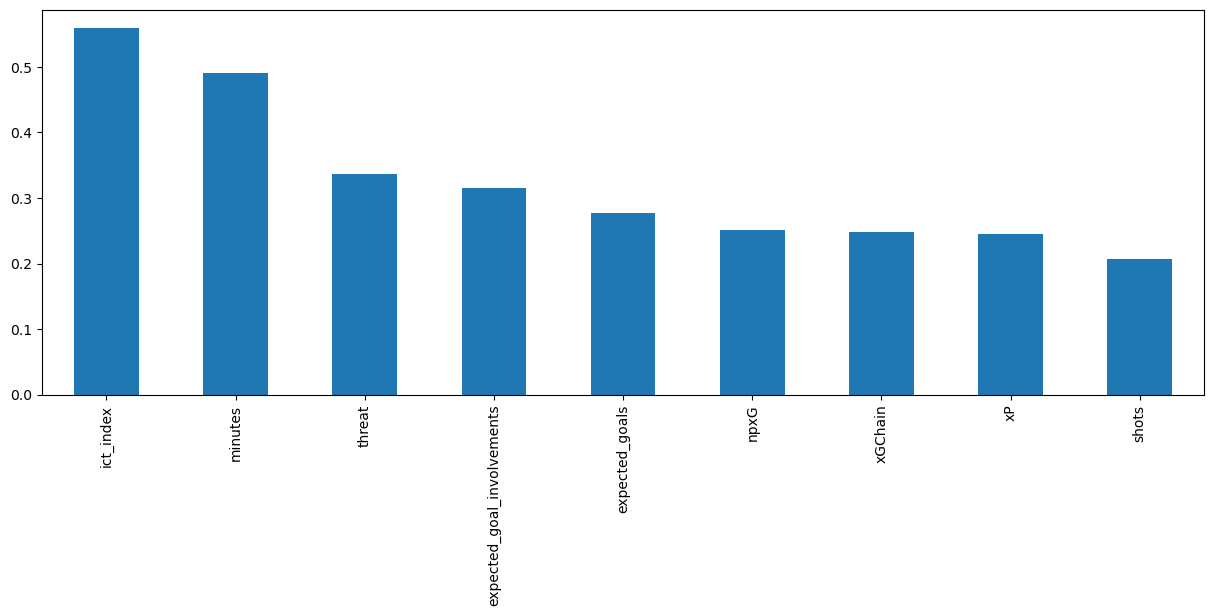

In [98]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

##### Select to 20% perct


In [99]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(k_sel_X_train, for_splits['target_train'])

selected_top_columns.get_support()

array([ True, False, False, False,  True,  True,  True, False, False])

In [100]:
for_20_columns = k_sel_X_train.columns[selected_top_columns.get_support()]

for_20_train = k_sel_X_train[for_20_columns]
for_20_test = k_sel_X_test[for_20_columns]


##### Model (MI)


###### Linear Model


In [101]:

MI_for_lin_reg = Linear_regression(for_20_train, for_20_test,
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(MI_for_lin_reg =  [MI_for_lin_reg['train_MAE'], MI_for_lin_reg['test_MAE'], MI_for_lin_reg['train_RMSE'], MI_for_lin_reg['test_RMSE'], MI_for_lin_reg['cv_rmse'], MI_for_lin_reg['R2_train'], MI_for_lin_reg['R2_test']])

for_evaluation_stats

Training set RMSE: 1.3218774514710336
Test set RMSE: 1.3759648428337778
Training set R2: 0.7479268353473578
Test set R2: 0.7589650359744671


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg,MI_for_lin_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877,0.586443,3.913920e-16,0.353403,0.558877,0.842456,2.573594e-15,0.416277,0.632675,0.914284
test_MAE,0.612897,7.119816e-01,0.705478,0.737142,0.612897,7.119816e-01,0.704279,0.737142,0.864978,9.792627e-01,0.736166,0.775704,0.960827
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187,0.889666,6.302489e-16,0.656765,0.896187,1.226947,5.263334e-15,0.761080,1.031916,1.321877
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626,0.956196,1.625687e+00,1.283493,1.223626,1.241991,1.930235e+00,1.345073,1.269387,1.375965
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588,0.898049,1.561820e+00,1.163596,1.150588,1.238834,1.748948e+00,1.294282,1.282757,1.325835
R2_train,0.885818,1.000000e+00,0.937900,0.884138,0.885818,1.000000e+00,0.937775,0.884138,0.782832,1.000000e+00,0.916439,0.846385,0.747927
R2_test,0.883598,6.570821e-01,0.789821,0.809382,0.883598,6.635356e-01,0.790274,0.809382,0.803618,5.256645e-01,0.769667,0.794858,0.758965


###### DecisionTree Model


In [102]:
MI_for_dt_reg = DecisionTreeRegression(for_20_train, for_20_test,
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(MI_for_dt_reg = [MI_for_dt_reg['train_MAE'], MI_for_dt_reg['test_MAE'], MI_for_dt_reg['train_RMSE'], MI_for_dt_reg['test_RMSE'], MI_for_dt_reg['cv_rmse'], MI_for_dt_reg['R2_train'], MI_for_dt_reg['R2_test']])

for_evaluation_stats



,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg,MI_for_lin_reg,MI_for_dt_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877,0.586443,3.913920e-16,0.353403,0.558877,0.842456,2.573594e-15,0.416277,0.632675,0.914284,0.003456
test_MAE,0.612897,7.119816e-01,0.705478,0.737142,0.612897,7.119816e-01,0.704279,0.737142,0.864978,9.792627e-01,0.736166,0.775704,0.960827,1.010369
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187,0.889666,6.302489e-16,0.656765,0.896187,1.226947,5.263334e-15,0.761080,1.031916,1.321877,0.072002
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626,0.956196,1.625687e+00,1.283493,1.223626,1.241991,1.930235e+00,1.345073,1.269387,1.375965,1.972886
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588,0.898049,1.561820e+00,1.163596,1.150588,1.238834,1.748948e+00,1.294282,1.282757,1.325835,1.728076
R2_train,0.885818,1.000000e+00,0.937900,0.884138,0.885818,1.000000e+00,0.937775,0.884138,0.782832,1.000000e+00,0.916439,0.846385,0.747927,0.999252
R2_test,0.883598,6.570821e-01,0.789821,0.809382,0.883598,6.635356e-01,0.790274,0.809382,0.803618,5.256645e-01,0.769667,0.794858,0.758965,0.504470


###### RandomForest Model


In [103]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
MI_for_rf_reg = RandomForestRegression(for_20_train, for_20_test,
                               for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(MI_for_rf_reg = [MI_for_rf_reg['train_MAE'], MI_for_rf_reg['test_MAE'], MI_for_rf_reg['train_RMSE'], MI_for_rf_reg['test_RMSE'], MI_for_rf_reg['cv_rmse'], MI_for_rf_reg['R2_train'], MI_for_rf_reg['R2_test']])

for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg,MI_for_lin_reg,MI_for_dt_reg,MI_for_rf_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877,0.586443,3.913920e-16,0.353403,0.558877,0.842456,2.573594e-15,0.416277,0.632675,0.914284,0.003456,0.453868
test_MAE,0.612897,7.119816e-01,0.705478,0.737142,0.612897,7.119816e-01,0.704279,0.737142,0.864978,9.792627e-01,0.736166,0.775704,0.960827,1.010369,0.798236
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187,0.889666,6.302489e-16,0.656765,0.896187,1.226947,5.263334e-15,0.761080,1.031916,1.321877,0.072002,0.841259
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626,0.956196,1.625687e+00,1.283493,1.223626,1.241991,1.930235e+00,1.345073,1.269387,1.375965,1.972886,1.473352
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588,0.898049,1.561820e+00,1.163596,1.150588,1.238834,1.748948e+00,1.294282,1.282757,1.325835,1.728076,1.301958
R2_train,0.885818,1.000000e+00,0.937900,0.884138,0.885818,1.000000e+00,0.937775,0.884138,0.782832,1.000000e+00,0.916439,0.846385,0.747927,0.999252,0.897905
R2_test,0.883598,6.570821e-01,0.789821,0.809382,0.883598,6.635356e-01,0.790274,0.809382,0.803618,5.256645e-01,0.769667,0.794858,0.758965,0.504470,0.723638


###### XgBoost Model


In [104]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
MI_for_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(MI_for_xgb_reg = [MI_for_xgb_reg['train_MAE'], MI_for_xgb_reg['test_MAE'], MI_for_xgb_reg['train_RMSE'], MI_for_xgb_reg['test_RMSE'], MI_for_xgb_reg['cv_rmse'], MI_for_xgb_reg['R2_train'], MI_for_xgb_reg['R2_test']])
for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg,MI_for_lin_reg,MI_for_dt_reg,MI_for_rf_reg,MI_for_xgb_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877,0.586443,3.913920e-16,0.353403,0.558877,0.842456,2.573594e-15,0.416277,0.632675,0.914284,0.003456,0.453868,0.632675
test_MAE,0.612897,7.119816e-01,0.705478,0.737142,0.612897,7.119816e-01,0.704279,0.737142,0.864978,9.792627e-01,0.736166,0.775704,0.960827,1.010369,0.798236,0.775704
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187,0.889666,6.302489e-16,0.656765,0.896187,1.226947,5.263334e-15,0.761080,1.031916,1.321877,0.072002,0.841259,1.031916
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626,0.956196,1.625687e+00,1.283493,1.223626,1.241991,1.930235e+00,1.345073,1.269387,1.375965,1.972886,1.473352,1.269387
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588,0.898049,1.561820e+00,1.163596,1.150588,1.238834,1.748948e+00,1.294282,1.282757,1.325835,1.728076,1.301958,1.282757
R2_train,0.885818,1.000000e+00,0.937900,0.884138,0.885818,1.000000e+00,0.937775,0.884138,0.782832,1.000000e+00,0.916439,0.846385,0.747927,0.999252,0.897905,0.846385
R2_test,0.883598,6.570821e-01,0.789821,0.809382,0.883598,6.635356e-01,0.790274,0.809382,0.803618,5.256645e-01,0.769667,0.794858,0.758965,0.504470,0.723638,0.794858


# Best Stats


In [105]:
for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg,MI_for_lin_reg,MI_for_dt_reg,MI_for_rf_reg,MI_for_xgb_reg
train_MAE,0.586443,4.291242e-16,0.353227,0.558877,0.586443,3.913920e-16,0.353403,0.558877,0.842456,2.573594e-15,0.416277,0.632675,0.914284,0.003456,0.453868,0.632675
test_MAE,0.612897,7.119816e-01,0.705478,0.737142,0.612897,7.119816e-01,0.704279,0.737142,0.864978,9.792627e-01,0.736166,0.775704,0.960827,1.010369,0.798236,0.775704
train_RMSE,0.889666,6.734482e-16,0.656106,0.896187,0.889666,6.302489e-16,0.656765,0.896187,1.226947,5.263334e-15,0.761080,1.031916,1.321877,0.072002,0.841259,1.031916
test_RMSE,0.956196,1.641203e+00,1.284877,1.223626,0.956196,1.625687e+00,1.283493,1.223626,1.241991,1.930235e+00,1.345073,1.269387,1.375965,1.972886,1.473352,1.269387
cv_rmse,0.898049,1.549568e+00,1.159589,1.150588,0.898049,1.561820e+00,1.163596,1.150588,1.238834,1.748948e+00,1.294282,1.282757,1.325835,1.728076,1.301958,1.282757
R2_train,0.885818,1.000000e+00,0.937900,0.884138,0.885818,1.000000e+00,0.937775,0.884138,0.782832,1.000000e+00,0.916439,0.846385,0.747927,0.999252,0.897905,0.846385
R2_test,0.883598,6.570821e-01,0.789821,0.809382,0.883598,6.635356e-01,0.790274,0.809382,0.803618,5.256645e-01,0.769667,0.794858,0.758965,0.504470,0.723638,0.794858


In [106]:
# Goalkeepers
# - BASE: lin


## Fine tuning the models


In [110]:
model = TransformedTargetRegressor(
        LinearRegression(), transformer=StandardScaler())


player_target = fwd_player_data['pts_bps']
player_features = fwd_player_data.drop("pts_bps", axis=1)

model.fit(player_features, player_target)




TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=StandardScaler())